# Breast Cancer Classification with Random Forest and Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv("./data/data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns='id', axis=1, inplace=True)
df.drop(columns='Unnamed: 32', axis=1, inplace=True)

### Encode target variable

In [5]:
le = LabelEncoder()

labels = le.fit_transform(df['diagnosis'])
df['target'] = labels

df.drop(columns='diagnosis', axis=1, inplace=True)

### Features and target

In [6]:
X = df.drop(columns=["target"])
y = df["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Random Forest Model

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix

(0.965034965034965,
 {'0': {'precision': 0.9666666666666667,
   'recall': 0.9775280898876404,
   'f1-score': 0.9720670391061452,
   'support': 89.0},
  '1': {'precision': 0.9622641509433962,
   'recall': 0.9444444444444444,
   'f1-score': 0.9532710280373832,
   'support': 54.0},
  'accuracy': 0.965034965034965,
  'macro avg': {'precision': 0.9644654088050315,
   'recall': 0.9609862671660424,
   'f1-score': 0.9626690335717643,
   'support': 143.0},
  'weighted avg': {'precision': 0.9650041782117255,
   'recall': 0.965034965034965,
   'f1-score': 0.9649692447165427,
   'support': 143.0}},
 array([[87,  2],
        [ 3, 51]]))

## Importances

In [11]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

In [12]:
print("Top 15 features:\n")
print(importances.head(15))

Top 15 features:

concave points_worst    0.172295
area_worst              0.123192
concave points_mean     0.090299
concavity_mean          0.083215
radius_worst            0.081277
perimeter_worst         0.071388
perimeter_mean          0.053146
area_se                 0.043551
area_mean               0.042780
radius_mean             0.039711
concavity_worst         0.031740
radius_se               0.019517
texture_worst           0.016490
compactness_worst       0.015801
texture_mean            0.014604
dtype: float64


/var/folders/71/xbr7jjyd7j76ypm3wty_l16c0000gn/T/ipykernel_70609/3942396782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="Blues_r")


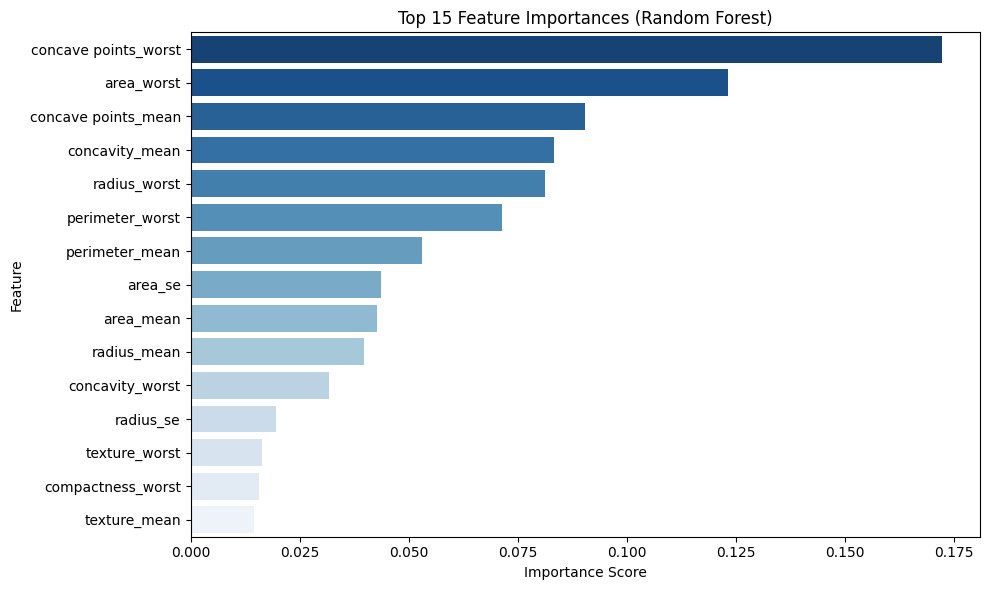

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="Blues_r")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [14]:
selected_features = [
    "concave points_worst",
    "area_worst",
    "radius_mean",
    "texture_mean",
    "compactness_worst"
]

In [15]:
X_reduced = X[selected_features]
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (569, 5)


## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, random_state=42)

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(Xr_train, yr_train)

/Users/manuel/Developer/breast-cancer-classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/manuel/Developer/breast-cancer-classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/manuel/Developer/breast-cancer-classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
yr_pred = lr.predict(Xr_test)

In [20]:
print("Accuracy:", accuracy_score(yr_test, yr_pred))
print("Classification Report:\n", classification_report(yr_test, yr_pred))
print("Confusion Matrix:\n", confusion_matrix(yr_test, yr_pred))

Accuracy: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Confusion Matrix:
 [[88  1]
 [ 4 50]]


### Logistic Regression Coefficients

In [21]:
coefficients = pd.Series(lr.coef_[0], index=selected_features)
coefficients_sorted = coefficients.sort_values()

In [22]:
coefficients_sorted

radius_mean            -1.377234
area_worst              0.022245
texture_mean            0.259992
concave points_worst    1.127459
compactness_worst       2.797228
dtype: float64

/var/folders/71/xbr7jjyd7j76ypm3wty_l16c0000gn/T/ipykernel_70609/1822187003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients_sorted.values, y=coefficients_sorted.index, palette="coolwarm")


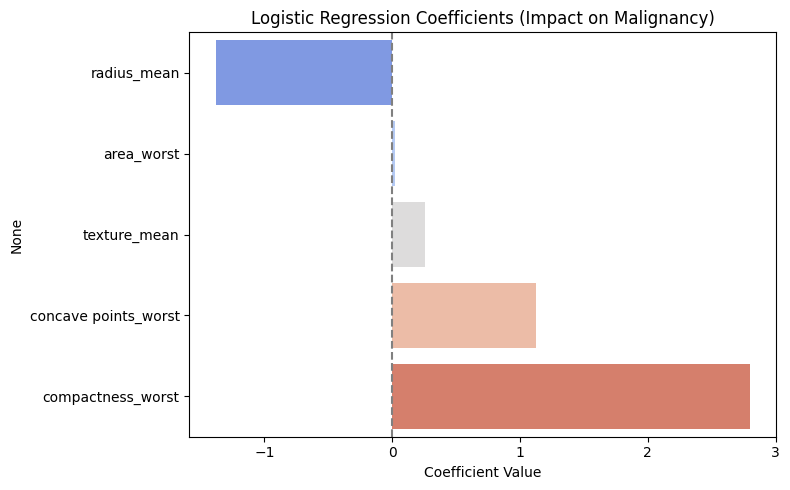

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients_sorted.values, y=coefficients_sorted.index, palette="coolwarm")
plt.axvline(0, color='gray', linestyle='--')
plt.title("Logistic Regression Coefficients (Impact on Malignancy)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

- Positive coefficients mean higher values of that feature increase the odds of the tumor being malignant.
- Negative coefficients mean the feature contributes toward a benign classification.

## Comparing the models

Both models perform extremely well, with almost the same accuracy of 0.97 (random forest) and 0.96 (logistic regression). 

Random Forest performs slightly better overall, particularly on malignant recall and F1-score.

Logistic Regression is nearly as good, with better benign precision and easier interpretability.

Confusion matrices show both models misclassified just 4–5 cases total, with RF making 1 fewer error in malignant prediction.

Because of this, I will export both models to be deployed as an API.

## Exporting the models

In [24]:
import joblib
from sklearn.preprocessing import StandardScaler

In [25]:
joblib.dump(rf, "./random_forest_model.pkl")
joblib.dump(lr, "./logistic_regression_model.pkl")

['./logistic_regression_model.pkl']

In [26]:
scaler_full = StandardScaler()
scaler_full.fit(X_train)
joblib.dump(scaler_full, "models/scaler_full.pkl")

scaler_logreg = StandardScaler()
scaler_logreg.fit(Xr_train)
joblib.dump(scaler_logreg, "models/scaler_logreg.pkl")

['models/scaler_logreg.pkl']